In [2]:
import pandas as pd
import numpy as np

In [3]:
df_confirm = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_death = pd.read_csv("time_series_covid19_deaths_global.csv")

In [4]:
index_val = [("cse",2019),("cse",2020),("cse",2021),("cse",2022),("ece",2019),("ece",2020),("ece",2021),("ece",2022)]

In [5]:
a = pd.Series([1,2,3,4,5,6,7,8],index = index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

```python
how to create multindex series ?
```

In [6]:
# multindexing is called hierarchical indexing
b = pd.MultiIndex.from_tuples(index_val)
b

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [7]:
b.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [8]:
b.levels[0]

Index(['cse', 'ece'], dtype='object')

In [9]:
c = pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
c

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [10]:
multi = pd.Series([1,2,3,4,5,6,7,8],index = b)
multi

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [11]:
multi[('cse',2022)]

4

In [12]:
multi['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

### Unstack Functions converts a multiindex series into a dataframe

In [13]:
temp =multi.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


### stack Functions converts a dataframe into a multiindex series

In [14]:
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

### But why do we use multindex because it helps us to reduce the dimension of dataframe

#### Multindexing on basis of rows

In [15]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = b ,columns=["avg package","salary in lpa"]
)

In [16]:
branch_df1

avg package  salary in lpa
cse 2019            1              2
    2020            3              4
    2021            5              6
    2022            7              8
ece 2019            9             10
    2020           11             12
    2021           13             14
    2022           15             16

In [17]:
branch_df1.shape

(8, 2)

In [18]:
branch_df1.loc['cse']

,avg package,salary in lpa
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [19]:
branch_df1["avg package"]

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg package, dtype: int64

#### Multindexing on basis of columns

In [20]:
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns= pd.MultiIndex.from_product([['delhi','mumbai'],["avg_packkage","students"]])
)

In [21]:
branch_df2
# 4d data represented in 2d

delhi                mumbai         
     avg_packkage students avg_packkage students
2019            1        2            0        0
2020            3        4            0        0
2021            5        6            0        0
2022            7        8            0        0

#### Multindexing on basis of cols and rows

In [22]:
branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0]
    ],
    index = b,
    columns= pd.MultiIndex.from_product([['delhi','mumbai'],["avg_packkage","students"]])
)

In [23]:
branch_df3

delhi                mumbai         
         avg_packkage students avg_packkage students
cse 2019            1        2            0        0
    2020            3        4            0        0
    2021            5        6            0        0
    2022            7        8            0        0
ece 2019            9       10            0        0
    2020           11       12            0        0
    2021           13       14            0        0
    2022           15       16            0        0

### Stacking and unstacking

```python
unstack changes row to columns
stack changes column to rows
```

In [24]:
branch_df1

avg package  salary in lpa
cse 2019            1              2
    2020            3              4
    2021            5              6
    2022            7              8
ece 2019            9             10
    2020           11             12
    2021           13             14
    2022           15             16

In [28]:
branch_df1.unstack()

avg package                salary in lpa               
           2019 2020 2021 2022          2019 2020 2021 2022
cse           1    3    5    7             2    4    6    8
ece           9   11   13   15            10   12   14   16

In [29]:
branch_df1.unstack().unstack()

avg package    2019  cse     1
                     ece     9
               2020  cse     3
                     ece    11
               2021  cse     5
                     ece    13
               2022  cse     7
                     ece    15
salary in lpa  2019  cse     2
                     ece    10
               2020  cse     4
                     ece    12
               2021  cse     6
                     ece    14
               2022  cse     8
                     ece    16
dtype: int64

In [30]:
branch_df1.unstack().stack()

C:\Users\hp\AppData\Local\Temp\ipykernel_780\1991893145.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack()


avg package  salary in lpa
cse 2019            1              2
    2020            3              4
    2021            5              6
    2022            7              8
ece 2019            9             10
    2020           11             12
    2021           13             14
    2022           15             16

In [31]:
branch_df3

delhi                mumbai         
         avg_packkage students avg_packkage students
cse 2019            1        2            0        0
    2020            3        4            0        0
    2021            5        6            0        0
    2022            7        8            0        0
ece 2019            9       10            0        0
    2020           11       12            0        0
    2021           13       14            0        0
    2022           15       16            0        0

In [32]:
branch_df3.unstack()

delhi                                              mumbai       \
    avg_packkage                students                avg_packkage        
            2019 2020 2021 2022     2019 2020 2021 2022         2019 2020   
cse            1    3    5    7        2    4    6    8            0    0   
ece            9   11   13   15       10   12   14   16            0    0   

                                       
              students                 
    2021 2022     2019 2020 2021 2022  
cse    0    0        0    0    0    0  
ece    0    0        0    0    0    0

In [33]:
branch_df3.unstack().unstack()

delhi   avg_packkage  2019  cse     1
                            ece     9
                      2020  cse     3
                            ece    11
                      2021  cse     5
                            ece    13
                      2022  cse     7
                            ece    15
        students      2019  cse     2
                            ece    10
                      2020  cse     4
                            ece    12
                      2021  cse     6
                            ece    14
                      2022  cse     8
                            ece    16
mumbai  avg_packkage  2019  cse     0
                            ece     0
                      2020  cse     0
                            ece     0
                      2021  cse     0
                            ece     0
                      2022  cse     0
                            ece     0
        students      2019  cse     0
                            ece     0
            

### Work with Multindex Dataframes

In [34]:
branch_df3

delhi                mumbai         
         avg_packkage students avg_packkage students
cse 2019            1        2            0        0
    2020            3        4            0        0
    2021            5        6            0        0
    2022            7        8            0        0
ece 2019            9       10            0        0
    2020           11       12            0        0
    2021           13       14            0        0
    2022           15       16            0        0

In [35]:
branch_df3.head()

delhi                mumbai         
         avg_packkage students avg_packkage students
cse 2019            1        2            0        0
    2020            3        4            0        0
    2021            5        6            0        0
    2022            7        8            0        0
ece 2019            9       10            0        0

In [36]:
branch_df3.tail()

delhi                mumbai         
         avg_packkage students avg_packkage students
cse 2022            7        8            0        0
ece 2019            9       10            0        0
    2020           11       12            0        0
    2021           13       14            0        0
    2022           15       16            0        0

In [37]:
branch_df3.shape

(8, 4)

In [41]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   (delhi, avg_packkage)   8 non-null      int64
 1   (delhi, students)       8 non-null      int64
 2   (mumbai, avg_packkage)  8 non-null      int64
 3   (mumbai, students)      8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [42]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [43]:
branch_df3.isnull()

delhi                mumbai         
         avg_packkage students avg_packkage students
cse 2019        False    False        False    False
    2020        False    False        False    False
    2021        False    False        False    False
    2022        False    False        False    False
ece 2019        False    False        False    False
    2020        False    False        False    False
    2021        False    False        False    False
    2022        False    False        False    False

In [ ]:
# Extracting rows 
branch_df3.loc[("cse",2022)]

delhi   avg_packkage    7
        students        8
mumbai  avg_packkage    0
        students        0
Name: (cse, 2022), dtype: int64

In [47]:
# multiple
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi                mumbai         
         avg_packkage students avg_packkage students
cse 2019            1        2            0        0
    2021            5        6            0        0
ece 2019            9       10            0        0

In [48]:
branch_df3['delhi']

avg_packkage  students
cse 2019             1         2
    2020             3         4
    2021             5         6
    2022             7         8
ece 2019             9        10
    2020            11        12
    2021            13        14
    2022            15        16

In [49]:
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [50]:
branch_df3.iloc[:,1:3]

delhi       mumbai
         students avg_packkage
cse 2019        2            0
    2020        4            0
    2021        6            0
    2022        8            0
ece 2019       10            0
    2020       12            0
    2021       14            0
    2022       16            0

In [53]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_packkage
cse,2019,2,0
ece,2019,10,0


In [54]:
# sort index
branch_df3.sort_index(ascending=False)

delhi                mumbai         
         avg_packkage students avg_packkage students
ece 2022           15       16            0        0
    2021           13       14            0        0
    2020           11       12            0        0
    2019            9       10            0        0
cse 2022            7        8            0        0
    2021            5        6            0        0
    2020            3        4            0        0
    2019            1        2            0        0

In [56]:
branch_df3.sort_index(ascending=[False,True])
# a list has been passed to show that at level 0 it should be descendign and at level 1 it should be ascending

delhi                mumbai         
         avg_packkage students avg_packkage students
ece 2019            9       10            0        0
    2020           11       12            0        0
    2021           13       14            0        0
    2022           15       16            0        0
cse 2019            1        2            0        0
    2020            3        4            0        0
    2021            5        6            0        0
    2022            7        8            0        0

In [58]:
# multindex dataframe(col) --> transpose
branch_df3.transpose()

cse                 ece               
                    2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_packkage    1    3    5    7    9   11   13   15
       students        2    4    6    8   10   12   14   16
mumbai avg_packkage    0    0    0    0    0    0    0    0
       students        0    0    0    0    0    0    0    0

In [60]:
branch_df3.swaplevel()
# levels has been swapped

delhi                mumbai         
         avg_packkage students avg_packkage students
2019 cse            1        2            0        0
2020 cse            3        4            0        0
2021 cse            5        6            0        0
2022 cse            7        8            0        0
2019 ece            9       10            0        0
2020 ece           11       12            0        0
2021 ece           13       14            0        0
2022 ece           15       16            0        0

In [61]:
branch_df3.swaplevel(axis=1)

avg_packkage students avg_packkage students
                delhi    delhi       mumbai   mumbai
cse 2019            1        2            0        0
    2020            3        4            0        0
    2021            5        6            0        0
    2022            7        8            0        0
ece 2019            9       10            0        0
    2020           11       12            0        0
    2021           13       14            0        0
    2022           15       16            0        0

## Long v/s Wide Data

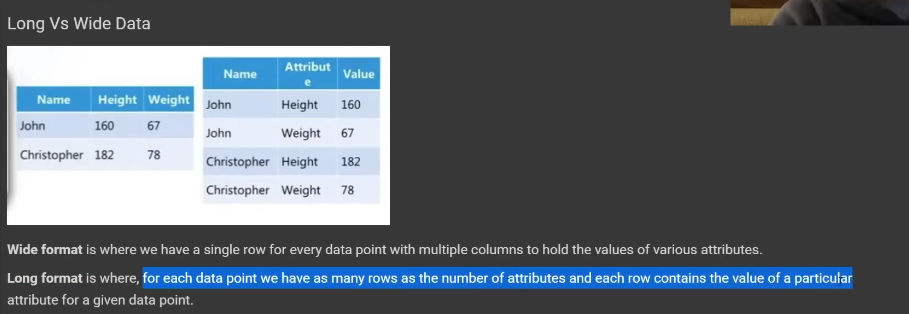

In [63]:
# melt --> simple example branch
# wide to long
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [64]:
pd.DataFrame({'cse':[120],'ece':[109],'mech':[50]})

,cse,ece,mech
0,120,109,50


In [66]:
pd.DataFrame({'cse':[120],'ece':[109],'mech':[50]}).melt(var_name='branch',value_name='students')

,branch,students
0,cse,120
1,ece,109
2,mech,50


In [67]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,140],
        '2022':[150,140,70]
    }
)

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,140,70


In [69]:
# here melt converted wide into long
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,140],
        '2022':[150,140,70]
    }
).melt()

,variable,value
0,branch,cse
1,branch,ece
2,branch,mech
3,2020,100
4,2020,150
5,2020,60
6,2021,120
7,2021,130
8,2021,140
9,2022,150


In [71]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,140],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name="year",value_name="students")

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,140
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [72]:
df_confirm

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334066,334108,334196,334294,334425,334425,334629,334661


In [73]:
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4022,4022,4023,4023,4024,4024,4024,4024


In [ ]:
death = df_death.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="date",value_name="deaths")
death

,Province/State,Country/Region,Lat,Long,date,deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [80]:
confirm = df_confirm.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="date",value_name="confirm")
confirm

,Province/State,Country/Region,Lat,Long,date,confirm
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [86]:
confirm.merge(death,on=["Province/State","Country/Region","Lat","Long","date"])[["Country/Region","date","deaths","confirm"]]

,Country/Region,date,deaths,confirm
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,5708,703228
311249,Winter Olympics 2022,1/2/23,0,535
311250,Yemen,1/2/23,2159,11945
311251,Zambia,1/2/23,4024,334661
